# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [47]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms to use
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, f1_score
from sklearn import metrics
from xgboost import XGBRegressor, XGBClassifier
import multiprocessing
import shap
import xgboost as xgb

## Data Overview

- Observations
- Sanity checks

In [52]:
#Import csv file with data
customer = pd.read_csv("ExtraaLearn.csv")

# Copying data to another variable to avoid any changes to original data
data = customer.copy()

#View the first 5 rows of the data set
data.head()


ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  
0                   No       No       1  
1                  Yes       No       0  
2                   No       No       0  
3                   No       No       1  
4                   No       No       0

In [53]:
#View the last 5 rows of the data set
data.tail()

ID  age current_occupation first_interaction profile_completed  \
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4607              15                    360                 2.170   
4608               8                   2327                 5.393   
4609               2                    212                 2.692   
4610               1                    154                 3.879   
4611               4                   2290                 2.075   

         last_activity print_media_type1 print_media_type2 digital_media  \
4607    Phone Activity                No                No            No   
4608    Email Activity                No                No            No   
4609    Email Activity                No                No            No   
4610  Website Activity               Yes                No            No   
4611    Phone Activity                No                No            No   

     educational_channels referral  status  
4607                  Yes       No       0  
4608                   No       No       0  
4609                   No       No       1  
4610                   No       No       0  
4611                   No       No       0

In [54]:
#View info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

* The dataset has **4,612 rows and 15 columns**.

* `age`, `website_visits`, `time_spent_on_website`, `status` and `page_views_per_visit`are of **numeric**,  while the rest of the columns are objects

* There are **no null values** in the dataset.

* **ID is an identifier**. Let's check if each entry of the column is unique.

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis.
- Let's drop this column.

In [55]:
data = data.drop(["ID"], axis = 1)
data.head()

age current_occupation first_interaction profile_completed  website_visits  \
0   57         Unemployed           Website              High               7   
1   56       Professional        Mobile App            Medium               2   
2   52       Professional           Website            Medium               3   
3   53         Unemployed           Website              High               4   
4   23            Student           Website              High               4   

   time_spent_on_website  page_views_per_visit     last_activity  \
0                   1639                 1.861  Website Activity   
1                     83                 0.320  Website Activity   
2                    330                 0.074  Website Activity   
3                    464                 2.057  Website Activity   
4                    600                16.914    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes                No           Yes                   No   
1                No                No            No                  Yes   
2                No                No           Yes                   No   
3                No                No            No                   No   
4                No                No            No                   No   

  referral  status  
0       No       1  
1       No       0  
2       No       0  
3       No       1  
4       No       0

In [56]:
#Observations
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

count        mean         std   min        25%  \
age                    4612.0   46.201214   13.161454  18.0   36.00000   
website_visits         4612.0    3.566782    2.829134   0.0    2.00000   
time_spent_on_website  4612.0  724.011275  743.828683   0.0  148.75000   
page_views_per_visit   4612.0    3.026126    1.968125   0.0    2.07775   
status                 4612.0    0.298569    0.457680   0.0    0.00000   

                           50%         75%       max  
age                     51.000    57.00000    63.000  
website_visits           3.000     5.00000    30.000  
time_spent_on_website  376.000  1336.75000  2537.000  
page_views_per_visit     2.792     3.75625    18.434  
status                   0.000     1.00000     1.000

**Observations:**

**Age:**
* Mean: 46.2 years; Median: 51 years → Slight left skew driven by younger ages.

* Most ages fall between 36 (25th percentile) and 57 (75th percentile).

* Range: 18 (youngest) to 63 (oldest).

**Website Visits:**
* Mean: 3.57 visits; Median: 3 visits → Right skew observed.

* Range: 0 to 30 visits, with most users visiting 2–5 times (IQR).

* Subset of users showed high engagement (maximum of 30 visits).

**Time Spent on Website:**
* Mean: 724 seconds (~12 minutes); Median: 376 seconds (~6 minutes) → Right skew present.

* Range: 0 to over 2500 seconds (~40+ minutes), with significant variation in engagement.

* Most users spent 148.75 (25th percentile) to 1336.75 (75th percentile) seconds.

**Page Views Per Visit:**
* Mean: 3.03 pages; Median: 2.79 pages → Right skew detected.

* Range: 0 to 18.43 pages, with the majority viewing 2–4 pages (IQR).

**Status:**
* The binary target variable indicates 30% of users belong to category 1.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

age
Skew : -0.72


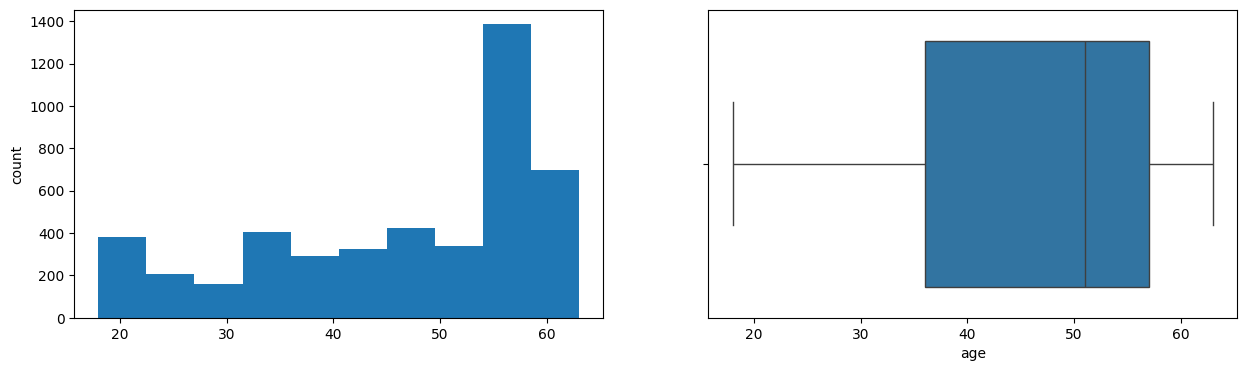

website_visits
Skew : 2.16


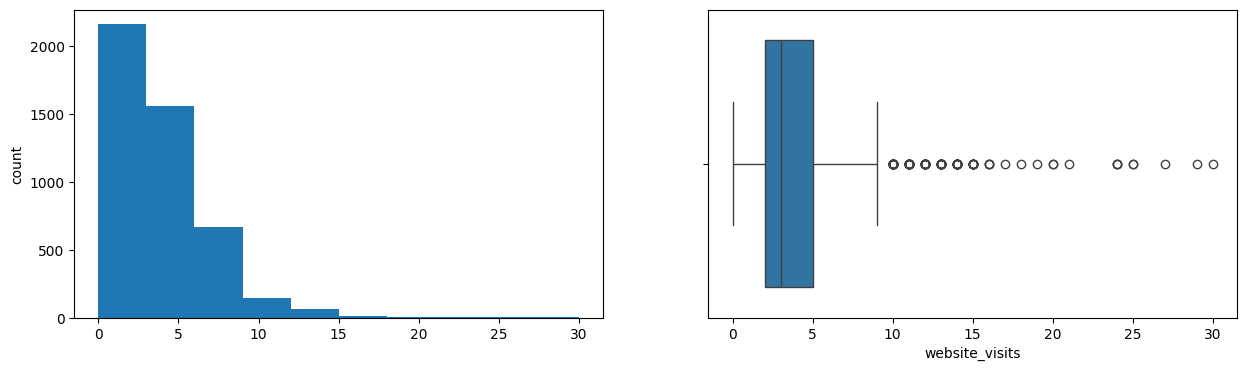

time_spent_on_website
Skew : 0.95


page_views_per_visit
Skew : 1.27


In [57]:
#Checking the distribution and outliers for numerical columns in the data
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1,2,1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observations:**

* Age (-0.72 skew): Most ages are in the higher range; consistent, few outliers.

* Website Visits (2.16 skew): Most visits are low, but a few users visit a lot; many outliers.

* Time Spent (0.95 skew): Most spend little time, with a moderate tail toward longer times.

* Pages per View (1.27 skew): Most view few pages, but some view significantly more; many outliers.

In [10]:
#Check categorical variables.  Status is numerical but can also be categorical
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1',
        'print_media_type2', 'digital_media', 'educational_channels', 'referral','status']

for col in cat_cols:
    print(data[col].value_counts(normalize = True))  # The parameter normalize = True gives the percentage of each category
    print('*'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

**Observations:**

* Current Occupation: Most are professionals (56.7%), with smaller proportions of unemployed (31.2%) and students (12.0%).

* First Interaction: Slightly more users interacted via the website (55.1%) than the mobile app (44.9%).

* Profile Completed: High and medium completion levels are nearly equal (49.1% and 48.6%), with very few low completions (2.3%).

* Last Activity: Email activity dominates (49.4%), followed by phone activity (26.8%) and website activity (23.9%).

* Print Media: Both types show low engagement, with "No" responses at 89.2% and 94.9% respectively.

* Digital Media: Most users do not engage (88.6%), while 11.4% do.

* Educational Channels: Minimal use, with "Yes" at 15.3%.

* Referral: Rare, with only 2.0% referred.

* Status: 29.9% converted

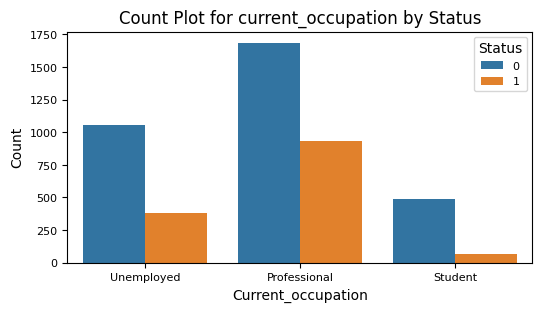

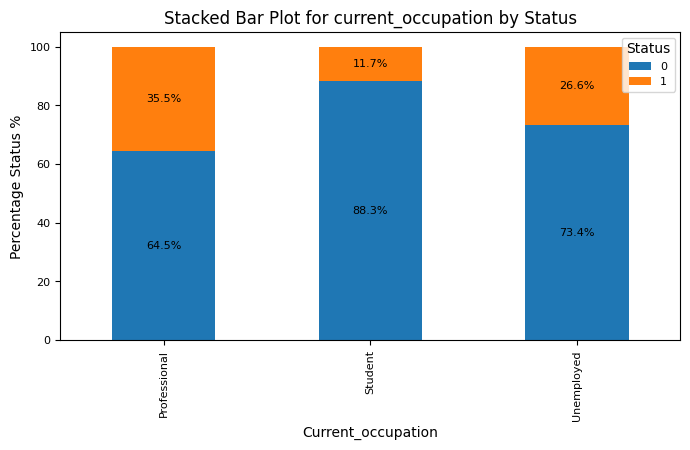

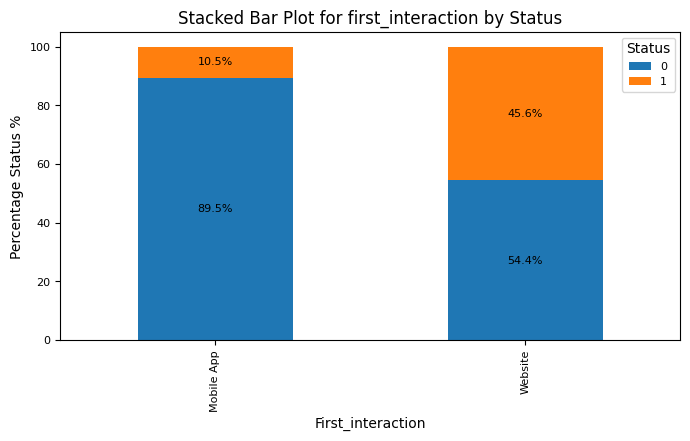

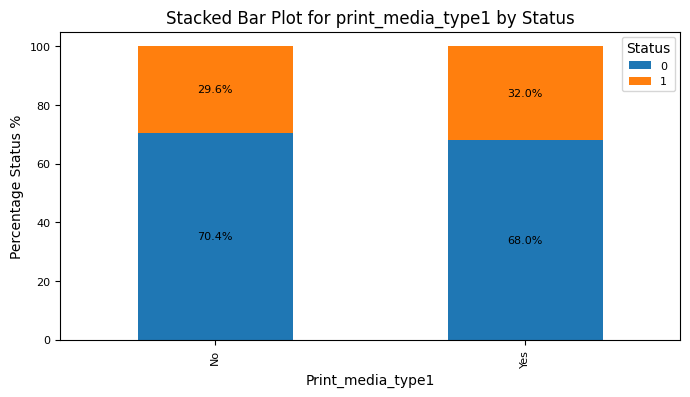

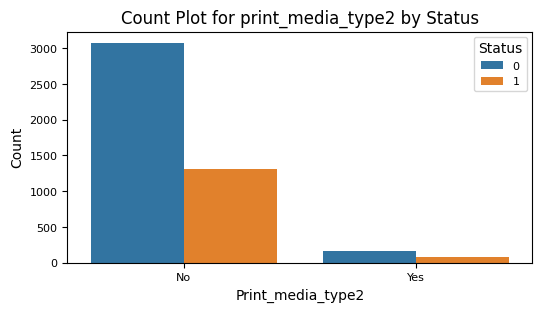

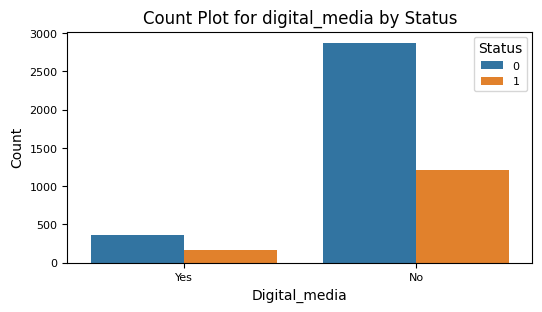

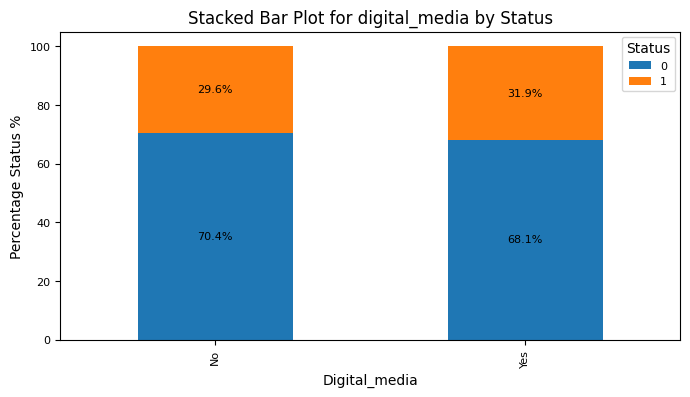

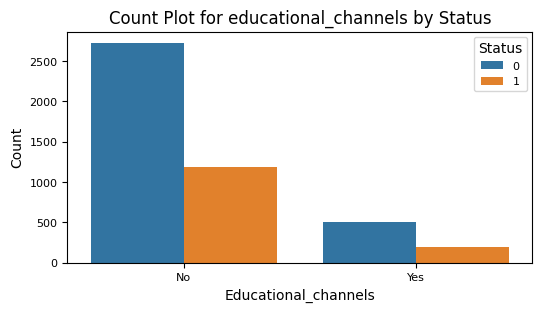

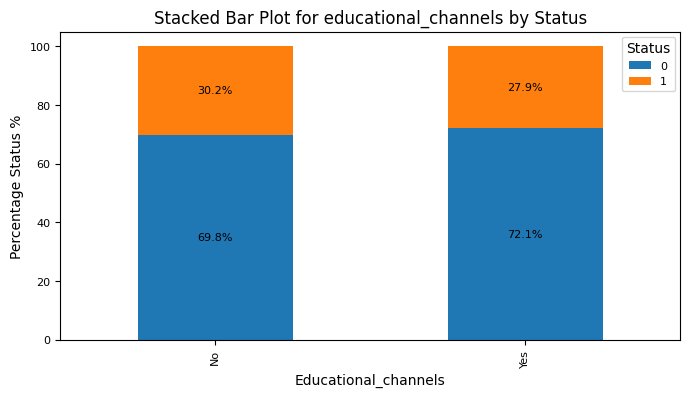

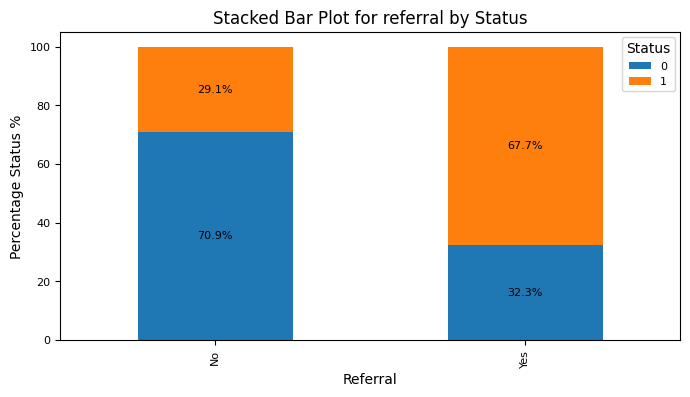

In [11]:
#Bivariate Analysis Overview
# List of columns to plot
columns_to_plot = ['current_occupation', 'first_interaction', 'profile_completed',
                   'last_activity', 'print_media_type1', 'print_media_type2',
                   'digital_media', 'educational_channels', 'referral']

# Loop through each column
for col in columns_to_plot:

    # Create smaller count plots
    plt.figure(figsize=(6,3))  # Reduced size
    sns.countplot(x=col, hue='status', data=data)
    plt.title(f"Count Plot for {col} by Status", fontsize=12)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.legend(title='Status', fontsize=8)  # Adjust legend font size
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

    # Create stacked bar plots with percentages
    if col != 'Attrition':
        crosstab = pd.crosstab(data[col], data['status'], normalize='index')*100
        ax = crosstab.plot(kind='bar', figsize=(8, 4), stacked=True)
        plt.ylabel('Percentage Status %')
        plt.title(f"Stacked Bar Plot for {col} by Status", fontsize=12)
        plt.xlabel(col.capitalize(), fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(title='Status', fontsize=8)

        # Annotate bars with percentages
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

        plt.show()

**Observations:**

* 35% of professionals, 26.6% of unemployed individuals, and 11.7% of students converted to paid customers. Professionals had the largest volume of data available.

* For first interactions, 45.6% of users converted via the website, compared to 10.5% via the mobile app.

* Regarding profile completion, 41.8% of users with completed profiles converted, compared to 18.9% for medium completion and 7.5% for low completion.

* In terms of last activity, the website had the highest conversion rate at 38.5%, followed by e-mail activity at 30.3% and phone activity at 21.3%. E-mail activity had the most extensive data available.

* Referrals drove a conversion rate of 67.7%, significantly higher than the 29.1% conversion rate for non-referrals.

**Questions:**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

* 35% of professionals, 26.6% of unemployed individuals, and 11.7% of students converted to paid customers. Professionals had the largest volume of data available.

2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

* For first interactions, 45.6% of users converted via the website, compared to 10.5% via the mobile app.

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

* Website interactions seem to be the most effective.

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

* Referrals have a very high conversion rate of 67.7%.  However, there aren't many referrals.

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

* Regarding profile completion, 41.8% of users with completed profiles converted, compared to 18.9% for medium completion and 7.5% for low completion.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

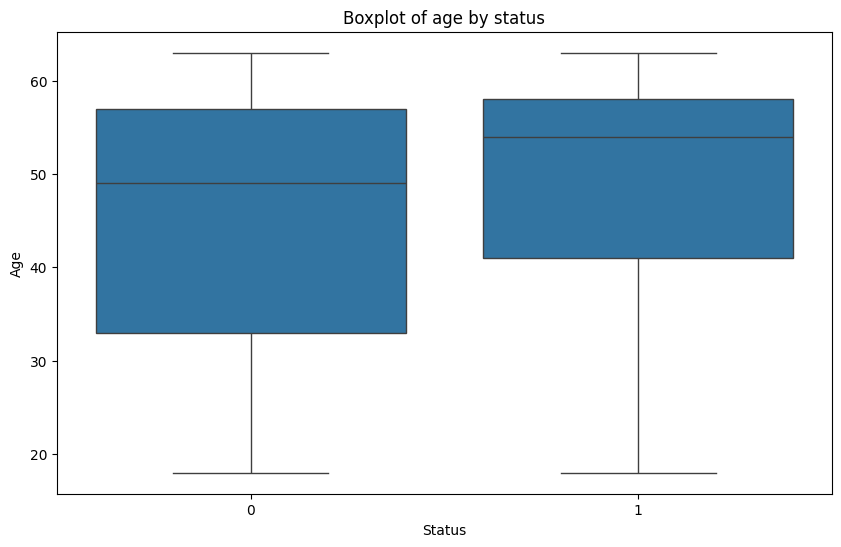

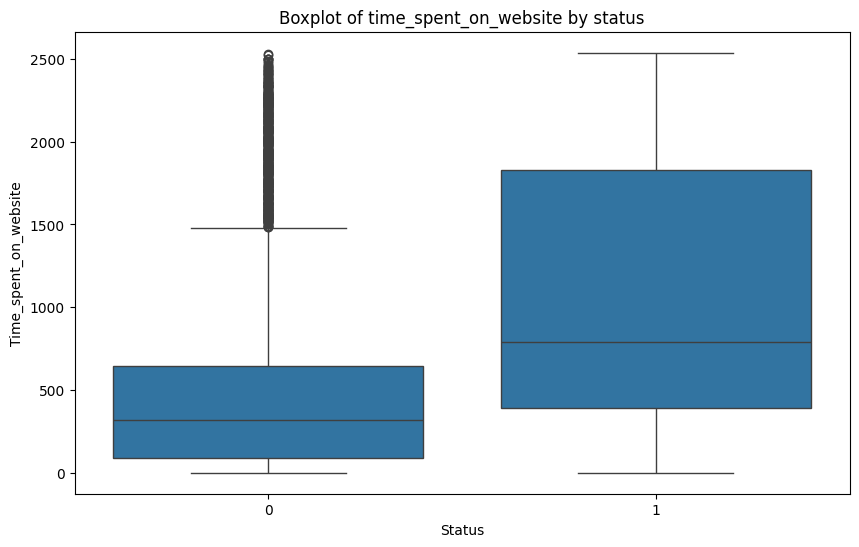

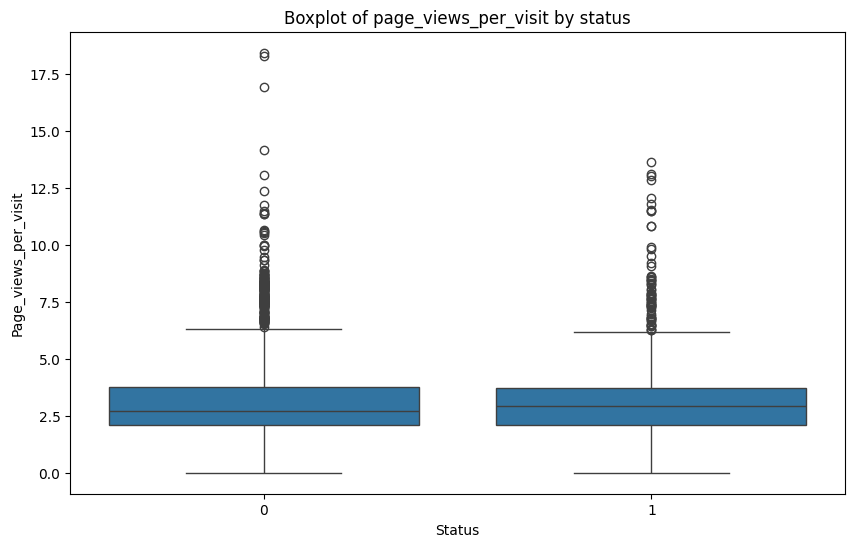

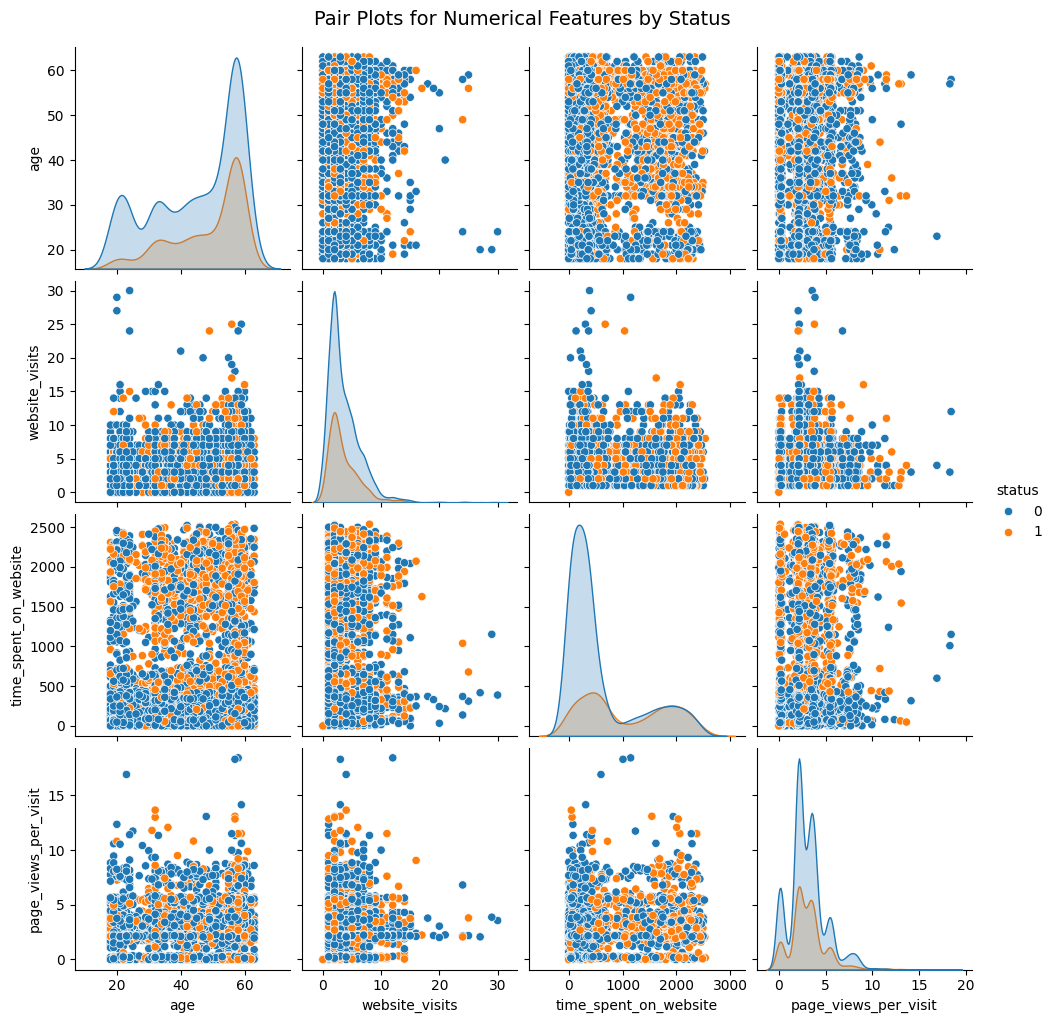

In [12]:
# List of numerical columns to loop through
columns_to_plot = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Function to create both boxplots and a pair plot
def create_visualizations(data, columns, x_col):
    # Loop to create boxplots for each numerical column
    for col in columns:
        plt.figure(figsize=(10, 6))

        # Create the boxplot
        sns.boxplot(data=data, x=x_col, y=col)

        # Add labels and title
        plt.title(f'Boxplot of {col} by {x_col}')
        plt.xlabel(x_col.capitalize())
        plt.ylabel(col.capitalize())

        # Show plot
        plt.show()

    # Create a pair plot for all numerical columns with the target variable as hue
    sns.pairplot(data, hue=x_col, vars=columns, height=2.5)
    plt.suptitle("Pair Plots for Numerical Features by Status", y=1.02, fontsize=14)  # Adding a title
    plt.show()

# Call the function
create_visualizations(data, columns_to_plot, x_col="status")


**Observations:**
* Age and the amount of time spent on the website positively influence conversion rates.

* For users who converted, the time spent on the website shows significant variability.

* Among users who did not convert, the time spent on the website exhibits a right-skewed distribution with noticeable outliers.

* Both page views per visit and the number of website visits demonstrate the presence of outliers and right-skewed distributions.

**Time Spent on Website:**

* Median (376) is much smaller than the mean (724), with a wide range (0 to 2537). This is likely highly right-skewed.

* Log transformation is strongly recommended.

**Website Visits:**

* Mean is higher than the median (3.566 vs. 3), and the max value (30) is quite
far from the 75th percentile (5), indicating right skewness.

* Log transformation would be helpful.

**Page Views per Visit:**

* Mean (3.026) is slightly higher than the median (2.792), and the max (18.434) is far from the 75th percentile (3.75625). This indicates moderate right skewness.

* Log transformation could improve the distribution.

**Include Features for Classification:**
* Certain fields are interconnected, so I've combined time_spent_on_website and page_views_per_visit into an engagement score to summarize user activity.
* Additionally, I've introduced an interaction ratio to evaluate the intensity of user interactions on the website.

**Log Transformation:**

Based on the above and re-examining the data, I will adjust for skewness:

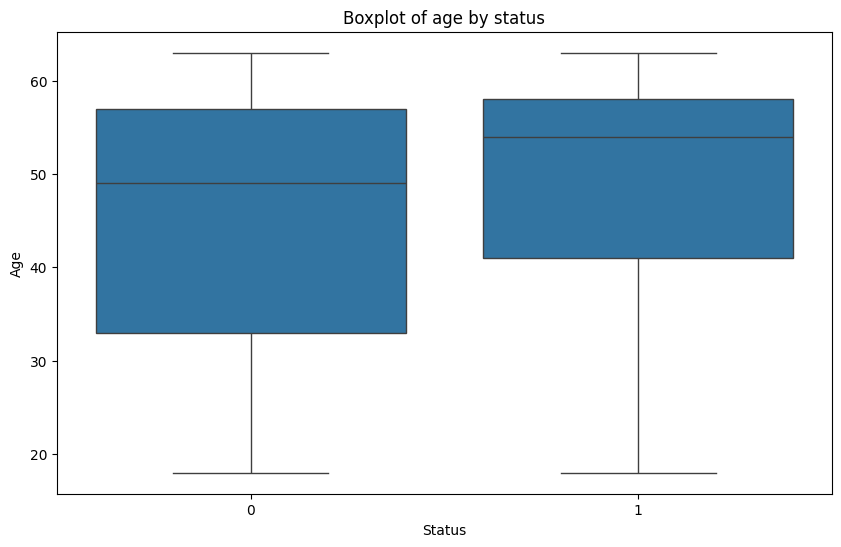

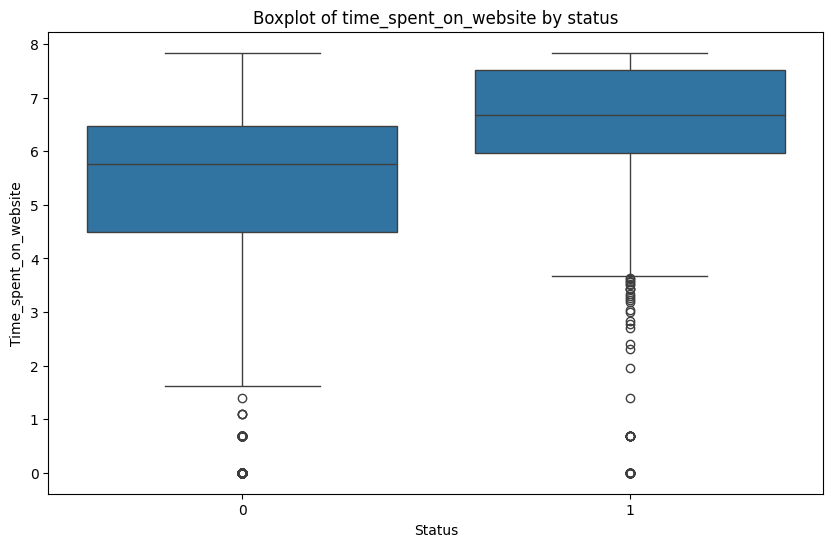

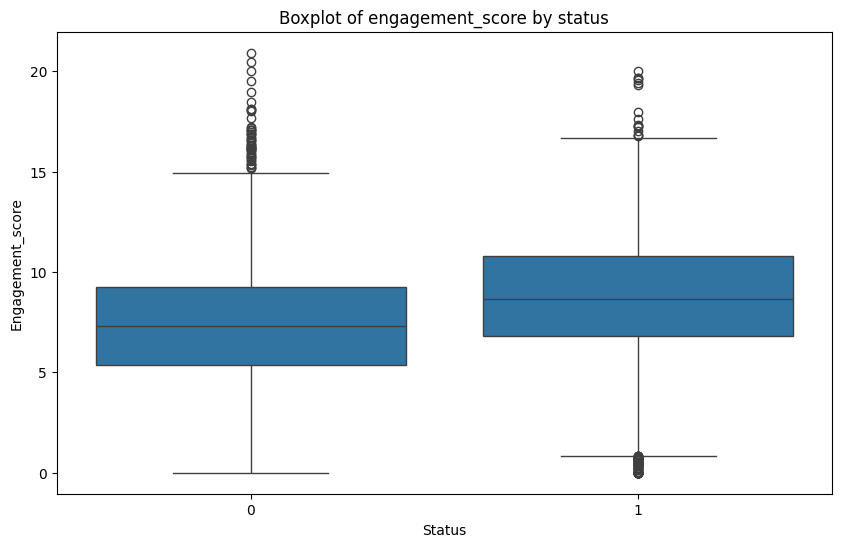

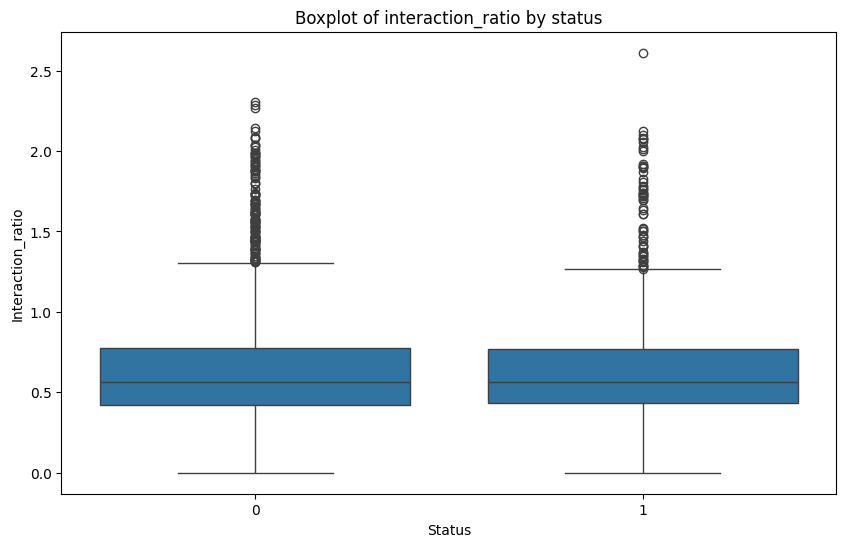

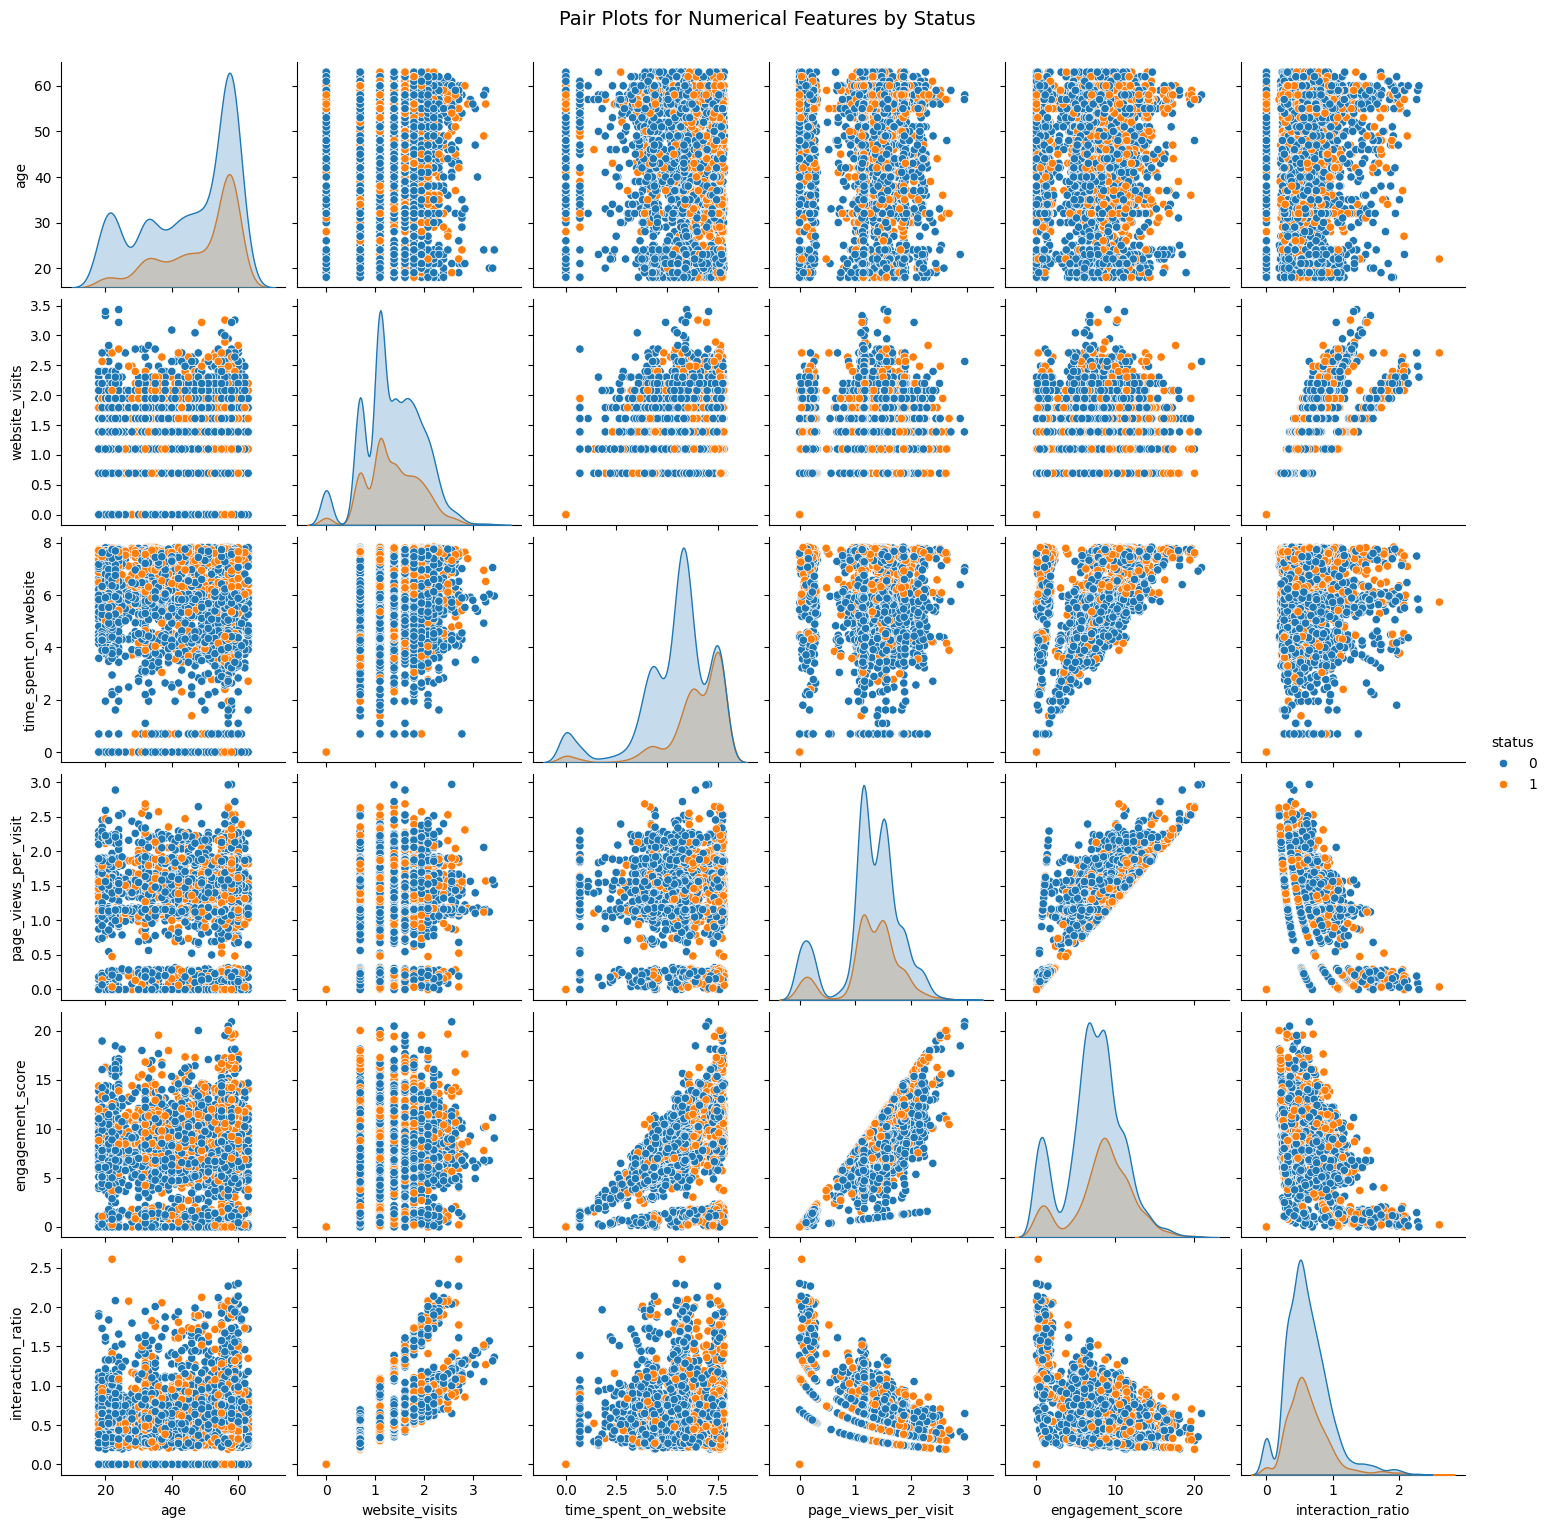

In [58]:
# Log Transformation to address skewness above
for col in ['website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    data[col] = np.log1p(data[col])  # log(1+x) to avoid log(0)

# Creating new features
data["engagement_score"] = data["time_spent_on_website"] * data["page_views_per_visit"]
data["interaction_ratio"] = data["website_visits"] / (data["page_views_per_visit"] + 1)  # Prevent division by zero

# Review data after transformation:
# Extend the list of numerical columns to include the new features
columns_to_plot = [
    'age',
    'website_visits',
    'time_spent_on_website',
    'page_views_per_visit',
    'engagement_score',
    'interaction_ratio'
]

# Function to create both boxplots and a pair plot to see if skewness is reduced
def create_visualizations(data, columns, x_col):
    # Loop to create boxplots for each numerical column
    for col in columns:
        plt.figure(figsize=(10, 6))

        # Create the boxplot
        sns.boxplot(data=data, x=x_col, y=col)

        # Add labels and title
        plt.title(f'Boxplot of {col} by {x_col}')
        plt.xlabel(x_col.capitalize())
        plt.ylabel(col.capitalize())

        # Show plot
        plt.show()

    # Create a pair plot for all numerical columns with the target variable as hue
    sns.pairplot(data, hue=x_col, vars=columns, height=2.5)
    plt.suptitle("Pair Plots for Numerical Features by Status", y=1.02, fontsize=14)  # Adding a title
    plt.show()

# Call the function
create_visualizations(data, columns_to_plot, x_col="status")


**Observations:**

* The transformations have reduced skewness.  Website Visits and Time Spent on Website: The transformations have reduced skewness, resulting in smoother distributions for both status 0 and status 1. Converted users (status 1) still appear more prominent at higher values, emphasizing their engagement.

* Conversion rates (status 1) still appear strongly associated with higher values of engagement-related metrics (time_spent_on_website and page_views_per_visit).

* Page Views per Visit: After scaling or transformation, the distributions now
highlight subtle differences between the groups, with status 1 users exhibiting slightly longer tails in the higher values.

Pairwise correlations between all the variables.

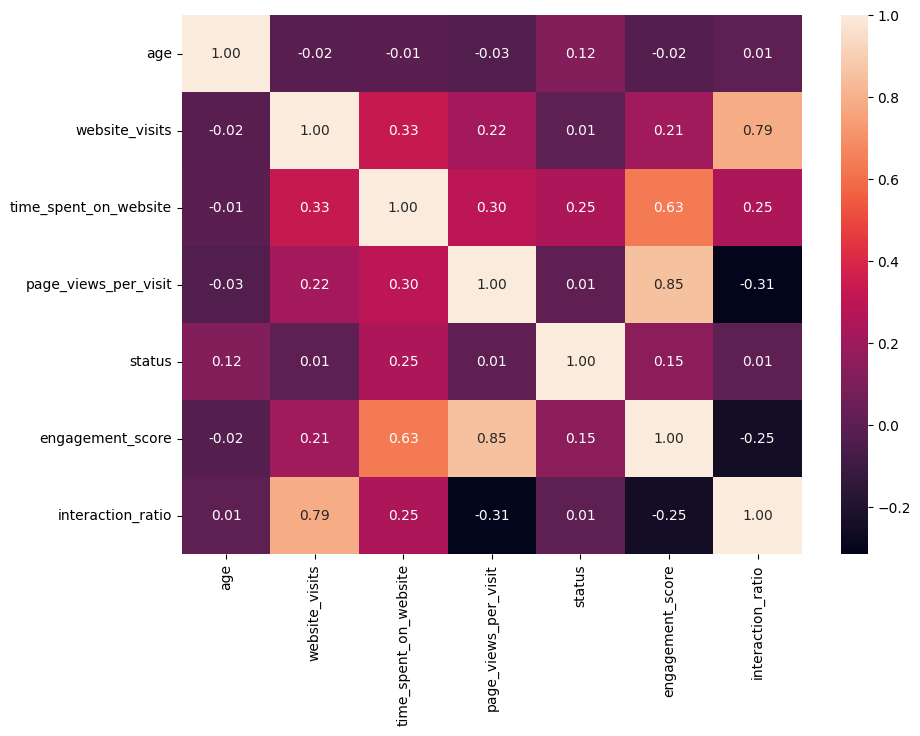

In [14]:
#Pairwise correlations between all the variables.
plt.figure(figsize=(10, 7))

# Select only the numeric columns
datanumbers = data.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(datanumbers.corr(), annot=True, fmt=".2f")

plt.show()

**Observations:**

* This highlights the positive correlation between status and age (12%) as well as status time spent on the website (25%).

* The newly created engagement score also shows positive correlation with status.

* Among the variables analyzed, time spent on the website exhibited the strongest correlation, reinforcing its significance in driving outcomes.




## **Preparing the data for modeling**

In [59]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')
Y = data['status']

# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

I acknowledge that this is primarily a classification problem. However, I am developing a quick regression model as a baseline for comparison with the classification results. While there is potential to enhance this regression model using techniques such as Lasso, Ridge, or PCA, my primary focus will remain on the classification methods, as this is the core objective of the assignment.


--- Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2258
           1       0.77      0.65      0.71       970

    accuracy                           0.84      3228
   macro avg       0.82      0.78      0.80      3228
weighted avg       0.83      0.84      0.83      3228



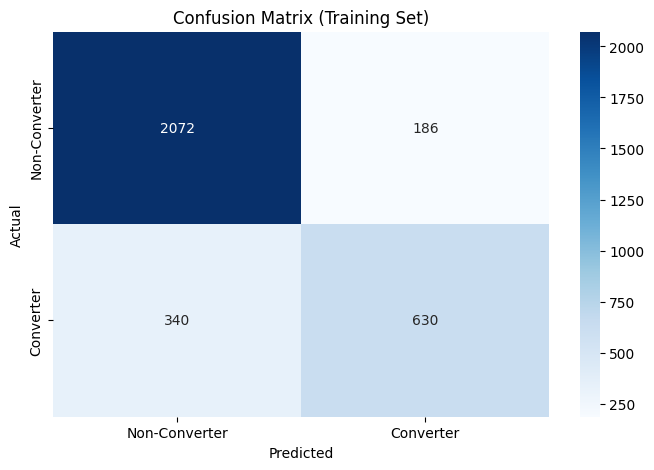


--- Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       977
           1       0.76      0.65      0.70       407

    accuracy                           0.84      1384
   macro avg       0.81      0.78      0.79      1384
weighted avg       0.83      0.84      0.83      1384



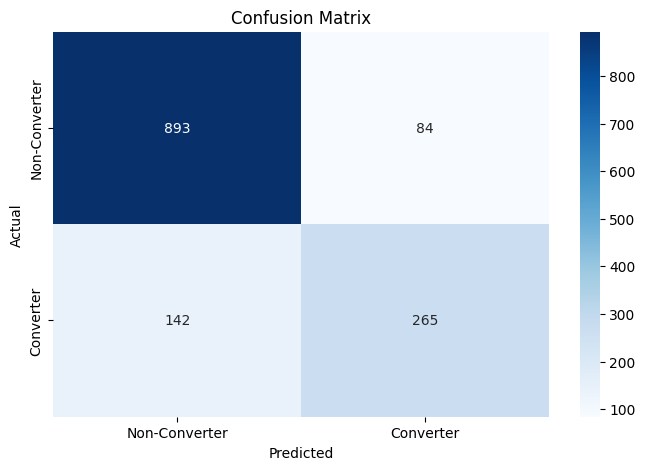


--- Variance Inflation Factor (VIF) ---
                            Feature       VIF
0                               age  1.987195
1                    website_visits  1.163796
2             time_spent_on_website  1.240981
3              page_views_per_visit  1.144655
4   current_occupation_Professional       inf
5        current_occupation_Student       inf
6     current_occupation_Unemployed       inf
7      first_interaction_Mobile App       inf
8         first_interaction_Website       inf
9            profile_completed_High       inf
10            profile_completed_Low       inf
11         profile_completed_Medium       inf
12     last_activity_Email Activity       inf
13     last_activity_Phone Activity       inf
14   last_activity_Website Activity       inf
15             print_media_type1_No       inf
16            print_media_type1_Yes       inf
17             print_media_type2_No       inf
18            print_media_type2_Yes       inf
19                 digital_media_No    

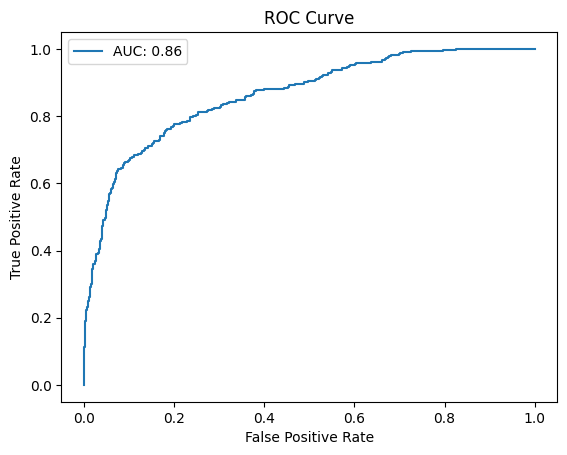

In [60]:
# This excludes the new features engagement score and interaction ratio and uses original features for cleaner interpretation and to avoid multicollinearity
# Function to evaluate metrics and plot confusion matrix
def metrics_score(actual, predicted, title="Confusion Matrix"):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Converter', 'Converter'], yticklabels=['Non-Converter', 'Converter'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Define features and target
X = data[['age', 'current_occupation', 'first_interaction', 'profile_completed',
          'website_visits', 'time_spent_on_website', 'page_views_per_visit',
          'last_activity', 'print_media_type1', 'print_media_type2',
          'digital_media', 'educational_channels', 'referral']]
y = data['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical and categorical columns
numerical_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
categorical_columns = ['current_occupation', 'first_interaction', 'profile_completed',
                       'last_activity', 'print_media_type1', 'print_media_type2',
                       'digital_media', 'educational_channels', 'referral']

# Preprocessor: Scale numerical columns and encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Make predictions on the training set and evaluate
y_pred_train = pipeline.predict(X_train)
print("\n--- Regression: Training Set Performance ---")
metrics_score(y_train, y_pred_train, title="Confusion Matrix (Training Set)")

# Checking performance on the testing data
y_pred_test = pipeline.predict(X_test)
print("\n--- Regression: Test Set Performance ---")
metrics_score(y_test, y_pred_test)

# Extract Coefficients and Feature Importance
# Get feature names (numerical + one-hot encoded)
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = numerical_columns + list(feature_names)

# Check for Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Preprocessed data for VIF calculation
X_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = all_feature_names
vif_data["VIF"] = [variance_inflation_factor(X_preprocessed, i) for i in range(X_preprocessed.shape[1])]

print("\n--- Variance Inflation Factor (VIF) ---")
print(vif_data)

# Extract coefficients from the logistic regression model
coefficients = pipeline.named_steps['model'].coef_[0]

# Combine feature names, coefficients, and odds ratios
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Convert coefficients to odds ratios
}).sort_values(by='Coefficient', ascending=False)

print("\n--- Feature Importance ---")
print(feature_importance)

# Plot the ROC Curve and AUC
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Building a Decision Tree model

In [63]:
# Define a function to plot the confusion matrix and classification report
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=["Converted", "Not Converted"], yticklabels=["Converted", "Not Converted"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion Matrix")
    plt.show()

# Add the additional features
X = data[['age', 'current_occupation', 'first_interaction', 'profile_completed',
          'website_visits', 'time_spent_on_website', 'page_views_per_visit',
          'engagement_score', 'interaction_ratio',
          'last_activity', 'print_media_type1', 'print_media_type2',
          'digital_media', 'educational_channels', 'referral']]

#  Convert categorical variables to dummy variables - was getting error so re-getting dummy variable
X = pd.get_dummies(X, drop_first=False)  # Apply one-hot encoding with drop_first=True to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)




DecisionTreeClassifier(random_state=7)

## Model Performance evaluation and improvement

Decision Tree: Training Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



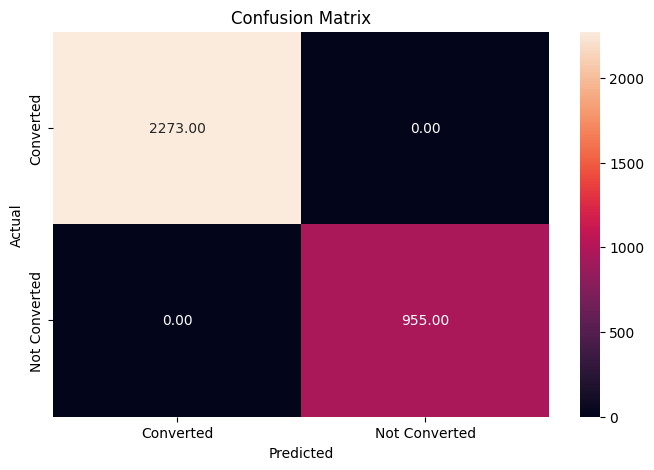

Decision Tree: Testing Data Performance:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       962
           1       0.68      0.67      0.67       422

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



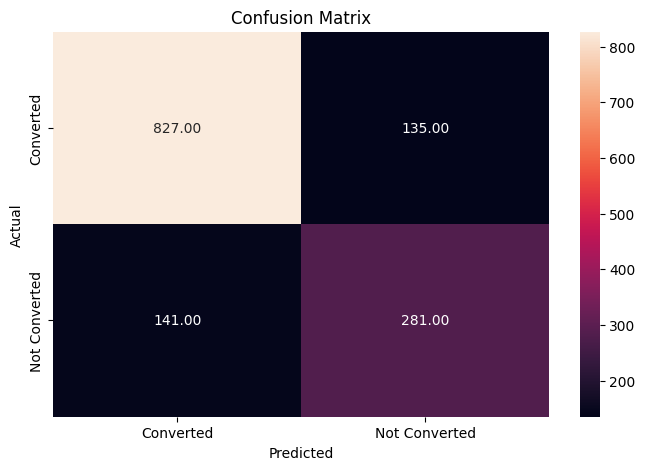

In [64]:
# Checking performance on the training data
y_pred_traind1 = d_tree.predict(X_train)
print("Decision Tree: Training Data Performance:")
metrics_score(y_train, y_pred_traind1)

# Checking performance on the testing data
y_pred_test1d1 = d_tree.predict(X_test)
print("Decision Tree: Testing Data Performance:")
metrics_score(y_test, y_pred_test1d1)

**Observations:**

* The Decision Tree model is overfitting the training data, as expected, which reduces its ability to generalize well on the test set.  Overfitting explains the perfect scores (e.g., precision, recall, F1-score) on the training set and the performance drop on the test set.

**Test set performance shows:**

* Overall accuracy is 80%, which is solid but leaves room for improvement.

* It’s worth noting that the imbalance in the dataset (majority vs. minority classes) affects the model’s ability to consistently predict the minority class. This is evident in the lower performance metrics for the minority class compared to the majority class in your second classification report.

### **Decision Tree - Hyperparameter Tuning**

* Class Imbalance Handling: By setting class_weight = 'balanced', addresses class imbalance, giving more weight to the minority class (Class 1), which is critical in imbalanced datasets.

* Hyperparameter Tuning: Using GridSearchCV to tune parameters like max_depth, criterion, and min_samples_leaf ensures the model is optimized for the best performance.

* Custom Scorer: By defining a custom scorer with f1_score for Class 1, focusing on a metric that balances precision and recall for the minority class.  Since this is a startup, balancing resources (sales team capacity) while trying to maximize conversions.

* Cross-Validation (cv = 5): Using cross-validation increases the robustness of  hyperparameter tuning and guards against overfitting.

In [65]:
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = 'balanced')

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(5),
                       min_samples_leaf=20, random_state=7)

Decision Tree Tuned: Training Data Performance:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2273
           1       0.70      0.86      0.77       955

    accuracy                           0.85      3228
   macro avg       0.82      0.85      0.83      3228
weighted avg       0.87      0.85      0.85      3228



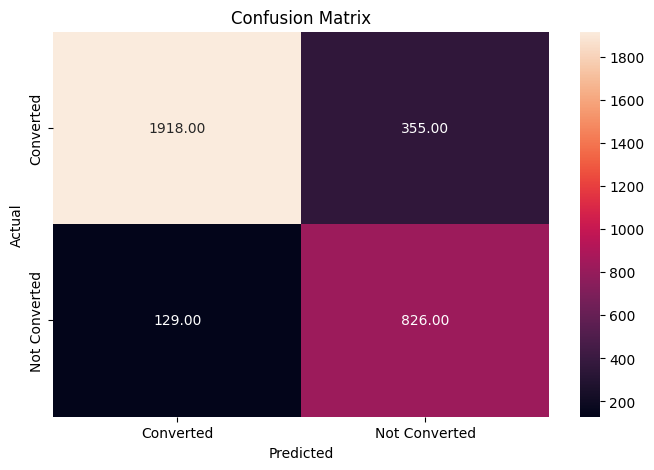

Decision Tree Tuned: Test Data Performance:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       962
           1       0.71      0.84      0.77       422

    accuracy                           0.85      1384
   macro avg       0.82      0.85      0.83      1384
weighted avg       0.86      0.85      0.85      1384



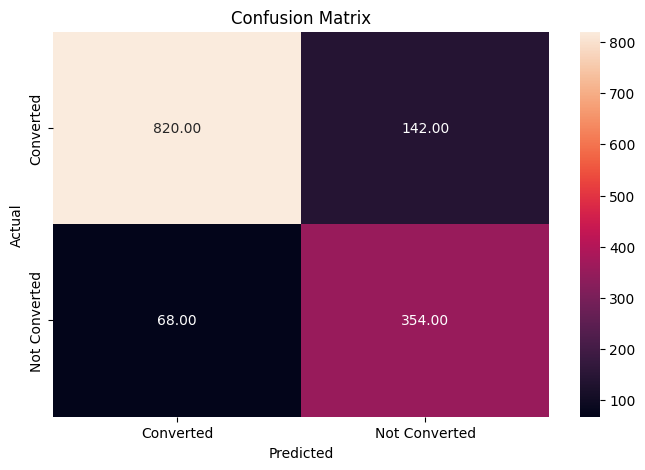

In [66]:
# Checking performance on the training data
y_pred_traind2 = d_tree_tuned.predict(X_train)
print("Decision Tree Tuned: Training Data Performance:")
metrics_score(y_train, y_pred_traind2)

# Checking performance on the testing data
y_pred_testd2 = d_tree_tuned.predict(X_test)
print("Decision Tree Tuned: Test Data Performance:")
metrics_score(y_test, y_pred_testd2)

In [67]:
#Reduce depth to 3 for visualization
tree_model = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=7)

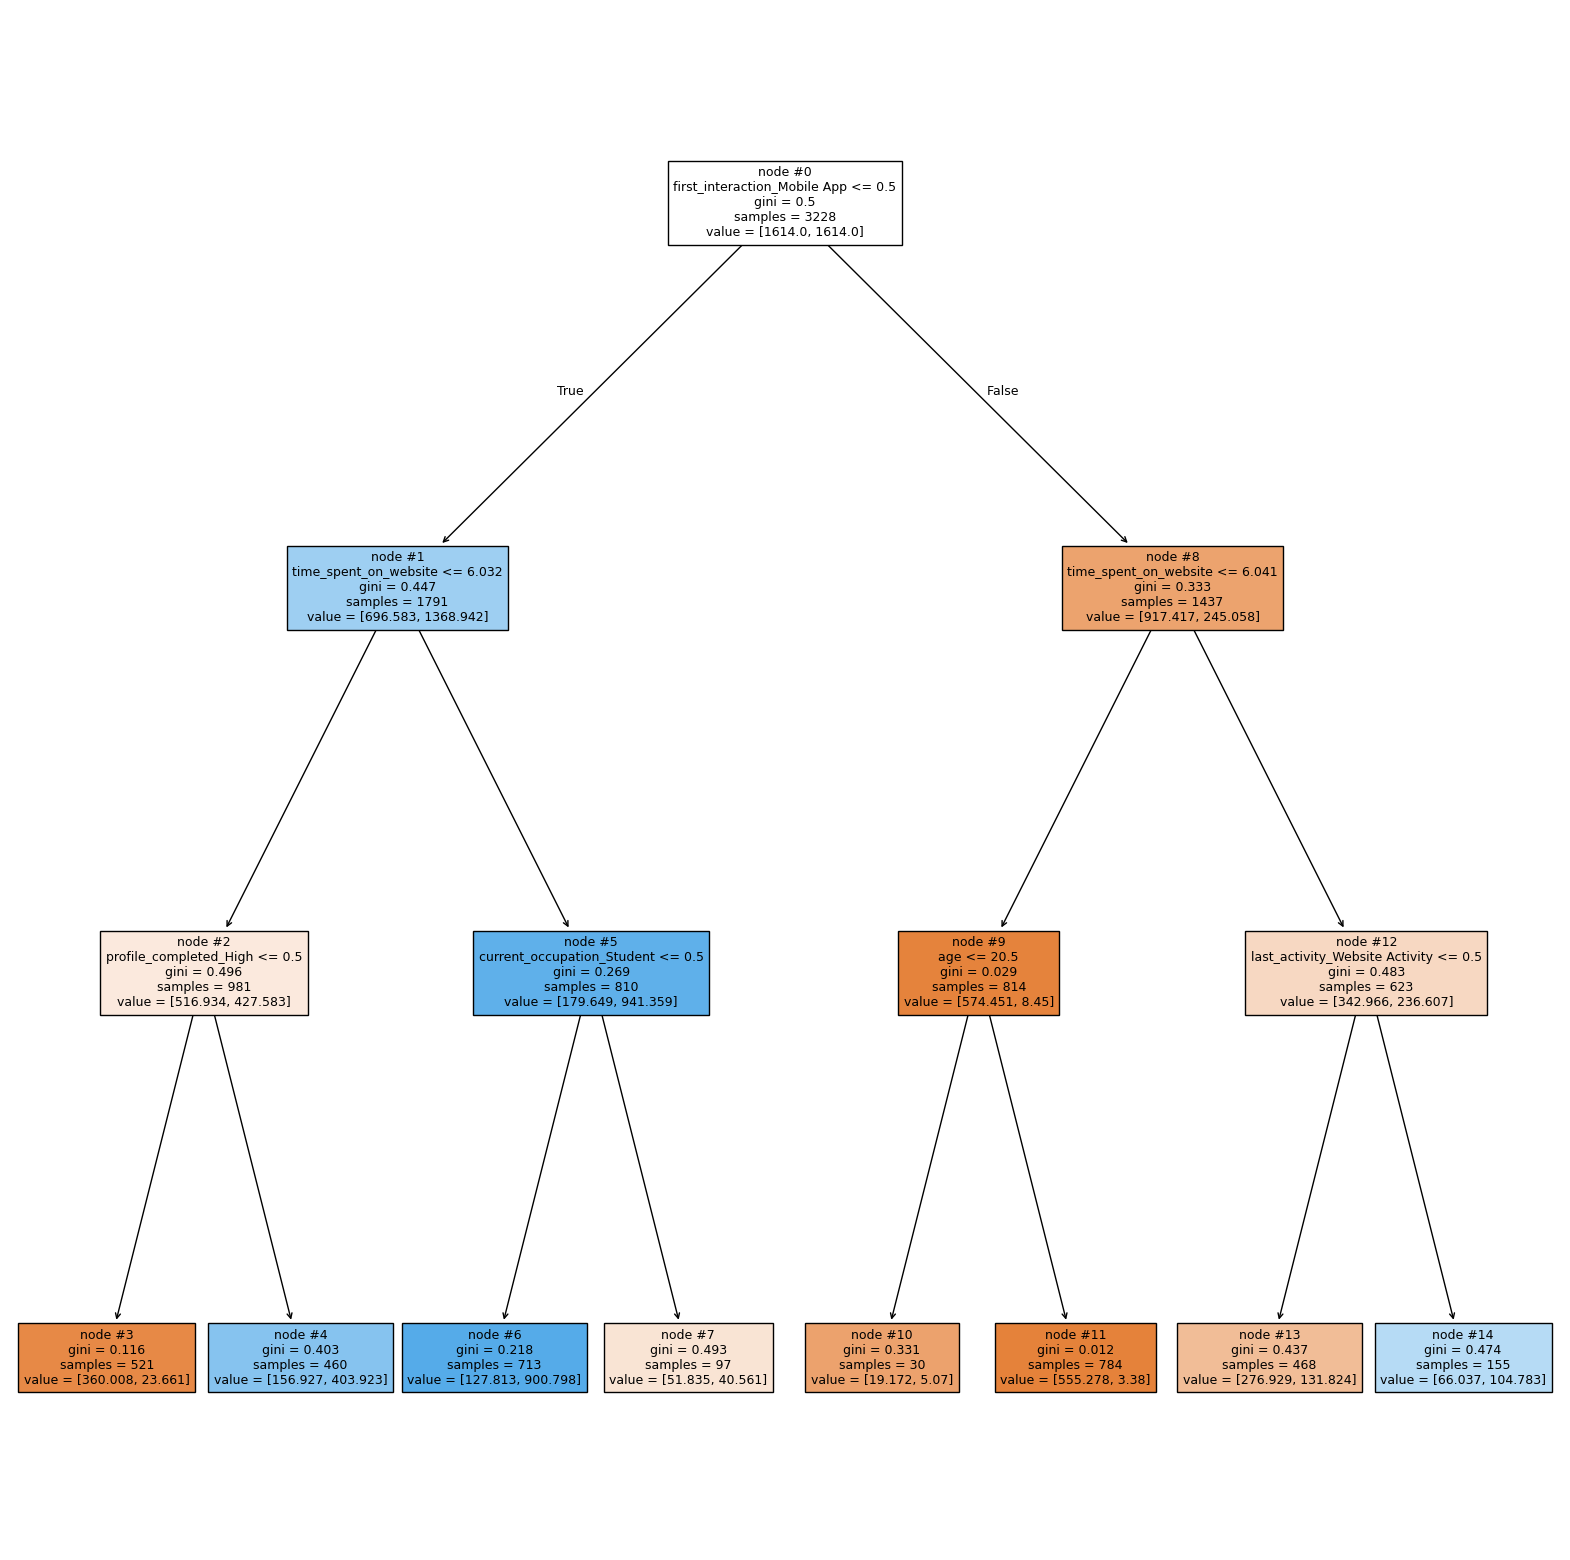

In [68]:
#Plot Tree
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = None)

plt.show()

**Observations:**
* The tree starts with the feature first_interaction_Mobile App at the root, splitting based on whether the value is <= 0.5.  This node samples where the first interaction was NOT through the mobile app.

* This indicates that first_interaction_Mobile App is the most significant feature in determining outcomes, as it’s the first decision point.

* 2nd most important is time spent on the website.

* Interestingly, users whose first interaction is via the mobile app appear less likely to convert. This could point to potential issues with the mobile app experience, making it less engaging or effective compared to the website. This aligns with insights from the logistic regression model, reinforcing the conclusion.

                                      Imp
first_interaction_Mobile App     0.319966
time_spent_on_website            0.259234
profile_completed_High           0.245264
current_occupation_Professional  0.052392
current_occupation_Student       0.034057
last_activity_Phone Activity     0.028137
last_activity_Website Activity   0.025097
age                              0.014836
profile_completed_Medium         0.008904
engagement_score                 0.008230
website_visits                   0.003880
first_interaction_Website        0.000000
current_occupation_Unemployed    0.000000
page_views_per_visit             0.000000
interaction_ratio                0.000000
last_activity_Email Activity     0.000000
profile_completed_Low            0.000000
print_media_type1_No             0.000000
print_media_type1_Yes            0.000000
print_media_type2_No             0.000000
print_media_type2_Yes            0.000000
digital_media_No                 0.000000
digital_media_Yes                0

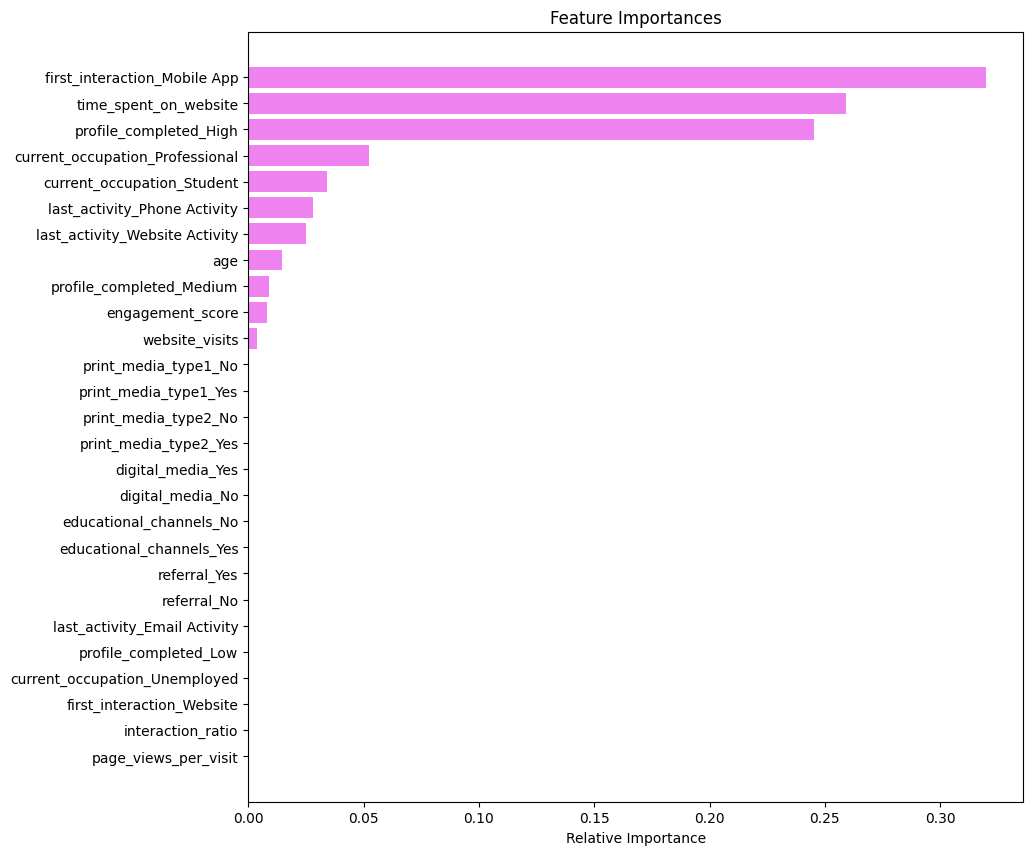

In [69]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

* Most important features are first_interaction_Mobile App, time_spent_on_website, and profile_competed_High.

* The decision tree suggests that students are less likely to convert compared to professionals. This is evident in splits where the feature current_occupation_Student directs samples toward branches with a lower proportion of conversions.  This also agrees with earlier bivariate plots and the regression analysis.

* Media and referral features seem to contribute minimally to this analysis. While referral cases exhibit high conversion rates, their overall impact remains limited due to the small proportion of users who come through referrals.

## Building a Random Forest model

## Model Performance evaluation and improvement

In [70]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

Random Forest Untuned: Training Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



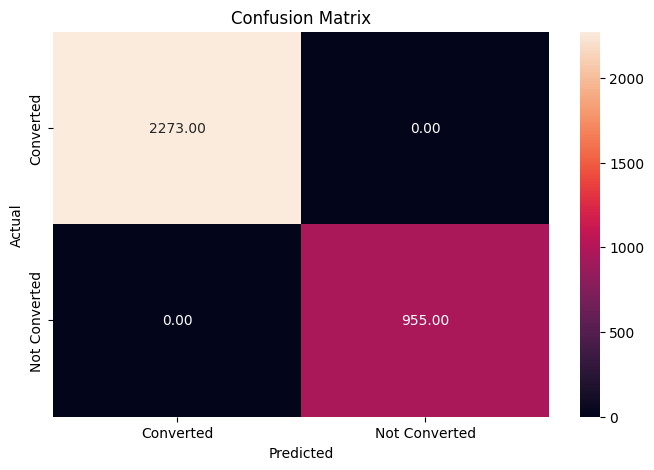

Random Forest Untuned: Test Data Performance:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.79      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



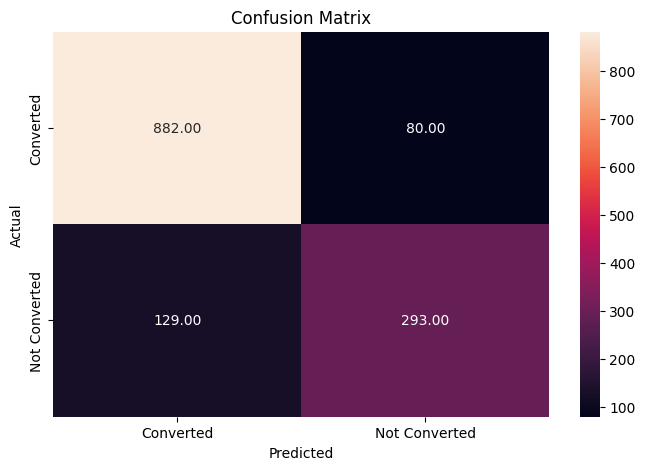

In [71]:
# Checking performance on the training data
y_pred_trainrf1 = rf_estimator.predict(X_train)
print("Random Forest Untuned: Training Data Performance:")
metrics_score(y_train, y_pred_trainrf1)

# Checking performance on the testing data
y_pred_testrf1 = rf_estimator.predict(X_test)
print("Random Forest Untuned: Test Data Performance:")
metrics_score(y_test, y_pred_testrf1)

**Observations:**
* Overfitting in the First Set: The near-perfect performance on the training set suggests the model is overfitted, capturing noise or patterns specific to the training data.

* Better Generalization in the Second Set: The drop in performance on the test set, especially for class 1, indicates the model struggles to generalize to unseen data.

In [72]:
#Random Forest Hyperparameter Tuning
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }
# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=7)

Random Forest Tuned: Training Data Performance:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2273
           1       0.72      0.86      0.78       955

    accuracy                           0.86      3228
   macro avg       0.83      0.86      0.84      3228
weighted avg       0.87      0.86      0.86      3228



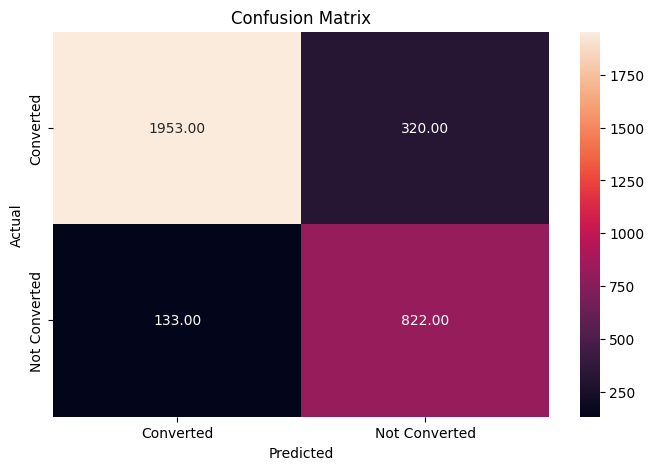

Random Forest Tuned: Test Data Performance:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       962
           1       0.73      0.83      0.78       422

    accuracy                           0.85      1384
   macro avg       0.82      0.85      0.83      1384
weighted avg       0.86      0.85      0.86      1384



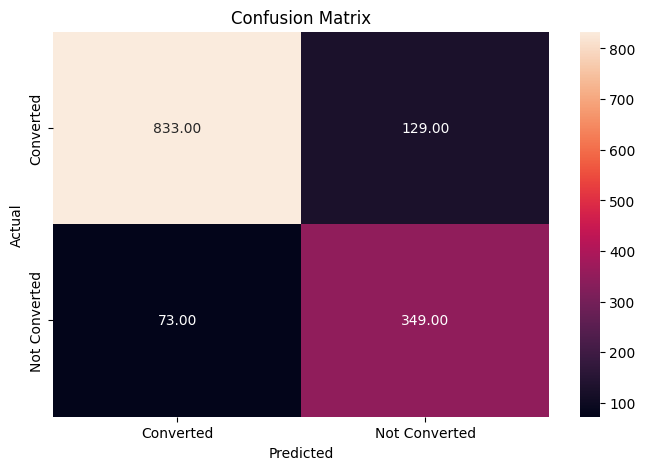

In [73]:
# Checking performance on the training data
y_pred_trainrf2 = rf_estimator_tuned_base.predict(X_train)
print("Random Forest Tuned: Training Data Performance:")
metrics_score(y_train, y_pred_trainrf2)

# Checking performance on the testing data
yF_pred_testrf2 = rf_estimator_tuned_base.predict(X_test)
print("Random Forest Tuned: Test Data Performance:")
metrics_score(y_test, yF_pred_testrf2)

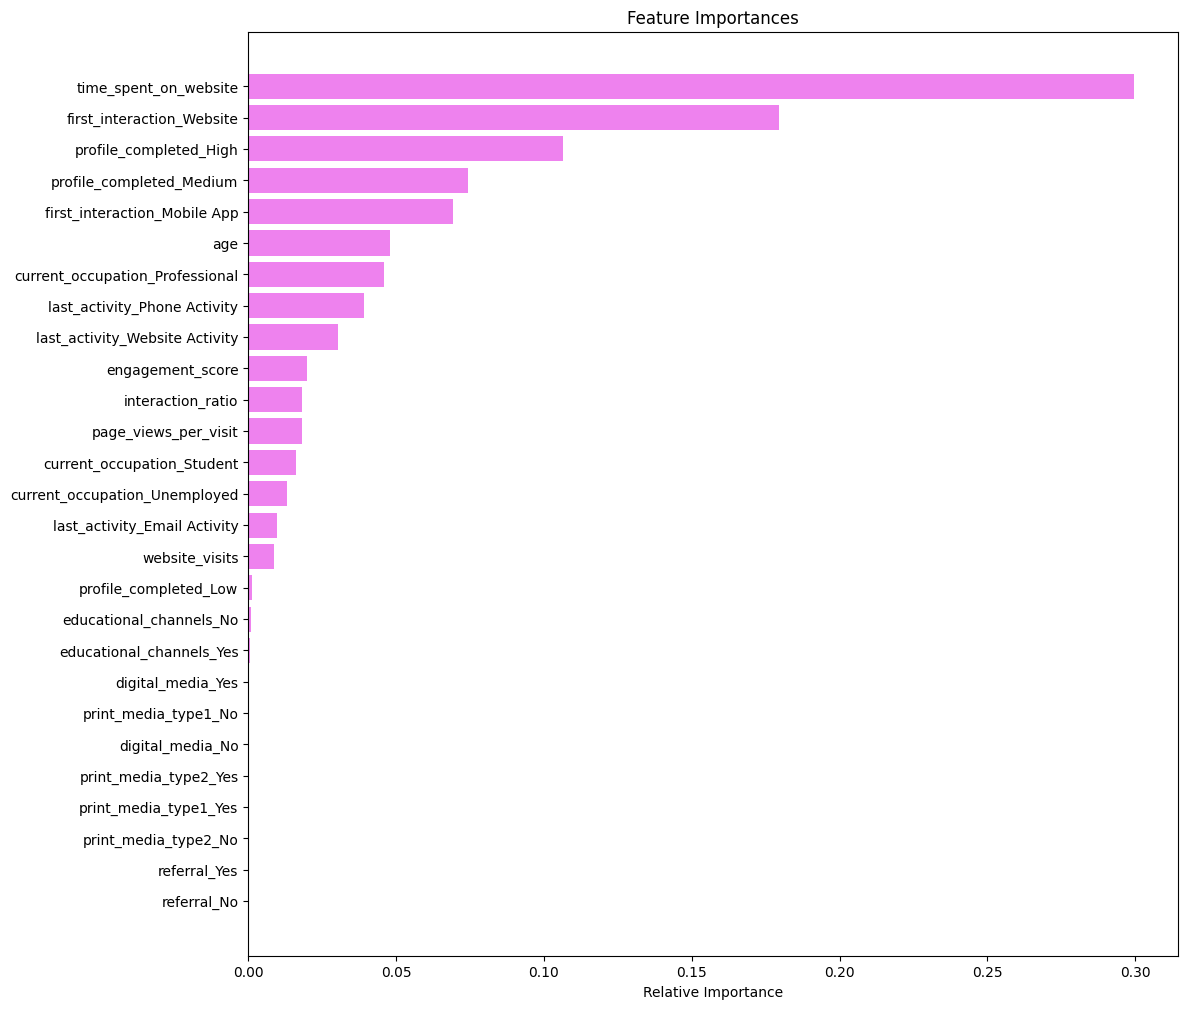

In [74]:
importances = rf_estimator_tuned_base.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## Actionable Insights and Recommendations

**Model Observations:**

* Performance Consistency: Training and test set metrics are very close, with no significant drops in performance. Not overfitted.

* Hyperparameter Tuning: There is potential to further refine the model by experimenting with additional hyperparameters or adjusting the current hyperparameter values to enhance performance.

* Efficiency in Tuning: Acknowledging that GridSearchCV can be computationally intensive, the number of values passed to each hyperparameter has been intentionally reduced to balance runtime with optimization efforts.

**Model Performance Summary**
* Accuracy: 86% for both training and 85% test sets, showing good generalization.

* Class 0: High precision (95%, 92%) and recall (86%, 87%), with strong F1-scores (90%, 89%).

* Class 1: Moderate precision (72%, 73%) but strong recall (86%, 83%), F1-scores at 78% for both sets.

* After hyperparameter tuning, the Random Forest model performs slightly better than the Decision Tree, achieving marginally higher overall accuracy and F1 scores for Class 1. However, the improvement is not substantial. If computational efficiency is a priority, the Decision Tree remains a valid choice due to its comparable performance. Additionally, decision trees are somewhat easier to interpret.

**Business Observations:**

* The most important features appear to be time_spent_on_website, first_interaction_Website, and profile_completed_High, followed by profile_completed_medium.
* This model places slightly more emphasis on time_spent_on_website compared to first_interaction_Website than the decision tree does, but the top three features remain consistent.
* Many other features, including media-related and referral features, contribute little to nothing in importance.
* While a high number of referrals converted, there were very few referrals compared to non referrals.While it is an effective channel, it has limited reach. *Random Forest after tuning had the most accuracy. Decision Trees were almost as good with slightly better interpretibility. The models seem to agree in general.

# XGBoost Regressor (Not in Notebook, But I would like to check)

In [75]:
from xgboost import XGBClassifier

# Choose the type of classifier
xgb_estimator_tuned = XGBClassifier(eval_metric='logloss', random_state=7)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 120],
    "max_depth": [6, 7],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "scale_pos_weight": [1, 3],  # Adjust for class imbalance
}

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(xgb_estimator_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
xgb_estimator_tuned = grid_obj.best_estimator_

XGBoost Untuned - Training Results:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2273
           1       0.94      0.92      0.93       955

    accuracy                           0.96      3228
   macro avg       0.95      0.95      0.95      3228
weighted avg       0.96      0.96      0.96      3228



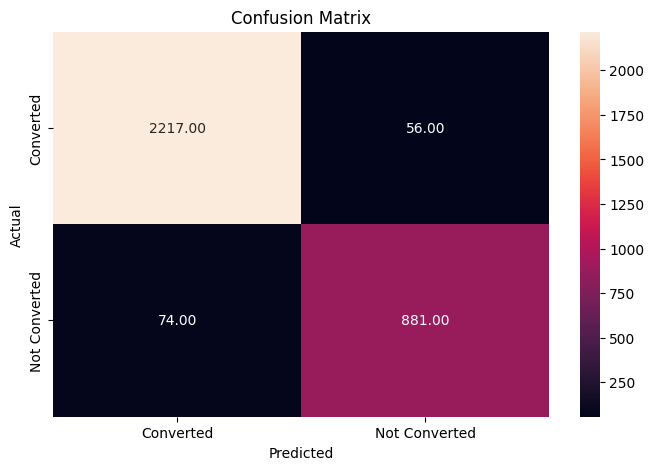

XGBoost Untuned - Test Results:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.71      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.86      0.85      1384



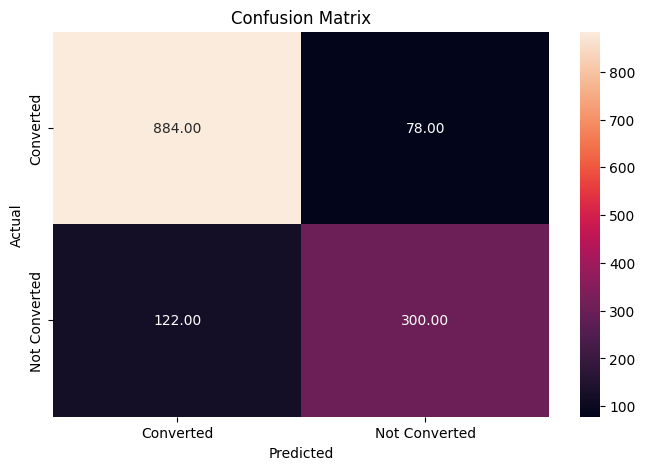

In [76]:
# Predictions and Metrics for XGBoost
y_pred_train_xgb = xgb_estimator_tuned.predict(X_train)
y_pred_test_xgb = xgb_estimator_tuned.predict(X_test)

print("XGBoost Untuned - Training Results:")
metrics_score(y_train, y_pred_train_xgb)
print("XGBoost Untuned - Test Results:")
metrics_score(y_test, y_pred_test_xgb)


In [77]:
# Choose the type of classifier
xgb_estimator_tuned = XGBClassifier(eval_metric='logloss', random_state=7)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "scale_pos_weight": [1, 3],  # Adjust for class imbalance
    "reg_alpha": [0, 0.1, 1],  # L1 regularization
    "reg_lambda": [1, 1.5, 2]  # L2 regularization
}

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label=1)

# Run the randomized search
random_search = RandomizedSearchCV(xgb_estimator_tuned, parameters, scoring=scorer, cv=5, n_iter=50, n_jobs=multiprocessing.cpu_count())
random_search = random_search.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
xgb_estimator_tuned = random_search.best_estimator_



XGBoost Tuned - Training Results:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2273
           1       0.85      0.74      0.79       955

    accuracy                           0.89      3228
   macro avg       0.88      0.84      0.86      3228
weighted avg       0.88      0.89      0.88      3228



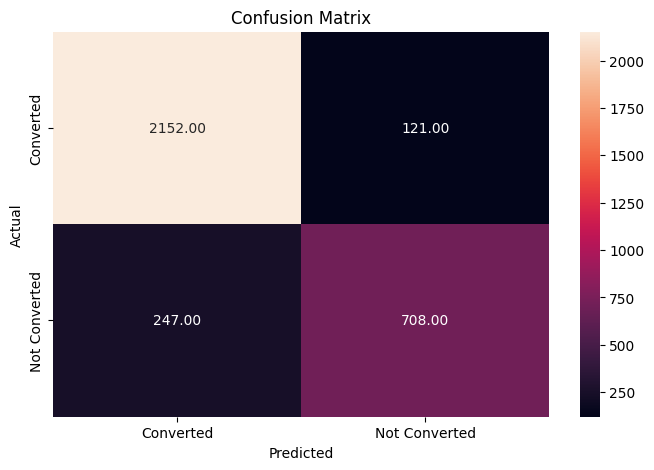

XGBoost Tuned - Test Results:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       962
           1       0.83      0.69      0.76       422

    accuracy                           0.86      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



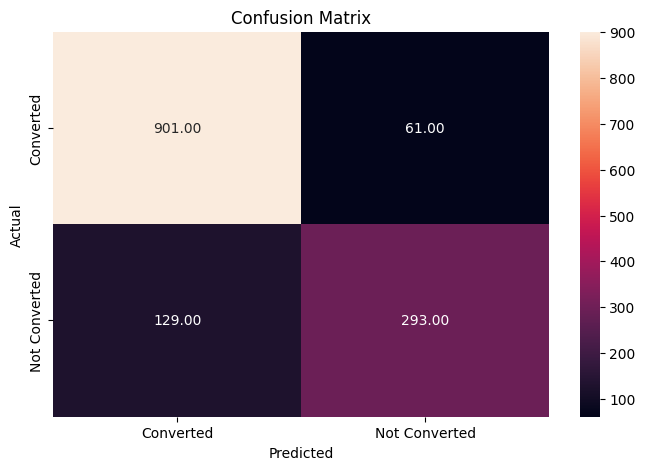

In [78]:
# Predictions and Metrics for XGBoost
y_pred_train_xgb2 = xgb_estimator_tuned.predict(X_train)
y_pred_test_xgb2 = xgb_estimator_tuned.predict(X_test)

print("XGBoost Tuned - Training Results:")
metrics_score(y_train, y_pred_train_xgb2)
print("XGBoost Tuned - Test Results:")
metrics_score(y_test, y_pred_test_xgb2)

In [79]:
# SHAP values for feature importance
explainer = shap.Explainer(xgb_estimator_tuned)
shap_values = explainer(X_train)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_train)

**Model Observations:**
* XGBoost and Random Forest both identify the same top three features as the most important. However, XGBoost places Professional in the fourth position, while Random Forest ranks it lower. Despite this difference, the overall insights from both models remain consistent.

**Metric Observations:**
* Accuracy: Both models have similar accuracy on the test set (0.85 for Random Forest and 0.86 for XGBoost).
* Class 0 Performance: XGBoost has slightly higher recall and F1-score for Class 0 on the test set.
* Class 1 Performance: Random Forest has higher recall for Class 1 on the test set, while XGBoost has higher precision.
* Overfitting: XGBoost shows a larger gap between training and test performance, indicating potential overfitting. Regularization techniques applied to XGBoost (like reg_alpha and reg_lambda) help mitigate this but might need further tuning.
* Random Forest: Easier to interpret and performs well with balanced precision and recall.
* XGBoost: Slightly better overall performance but may require careful tuning to avoid overfitting.

In [93]:
# Compute metrics for each model
metrics_dict = {
    'Model': ['Decision Tree (Tuned)', 'Random Forest (Tuned)', 'XGBoost (Tuned)'],
    'Weighted F1 Score': [
        f1_score(y_test, d_tree_tuned.predict(X_test), average='weighted'),
        f1_score(y_test, rf_estimator_tuned_base.predict(X_test), average='weighted'),
        f1_score(y_test, xgb_estimator_tuned.predict(X_test), average='weighted')
    ],
    'Class 0 F1 Score': [
        f1_score(y_test, d_tree_tuned.predict(X_test), labels=[0], average='macro'),
        f1_score(y_test, rf_estimator_tuned_base.predict(X_test), labels=[0], average='macro'),
        f1_score(y_test, xgb_estimator_tuned.predict(X_test), labels=[0], average='macro')
    ],
    'Class 1 F1 Score': [
        f1_score(y_test, d_tree_tuned.predict(X_test), labels=[1], average='macro'),
        f1_score(y_test, rf_estimator_tuned_base.predict(X_test), labels=[1], average='macro'),
        f1_score(y_test, xgb_estimator_tuned.predict(X_test), labels=[1], average='macro')
    ],
    'Accuracy': [
        accuracy_score(y_test, d_tree_tuned.predict(X_test)),
        accuracy_score(y_test, rf_estimator_tuned_base.predict(X_test)),
        accuracy_score(y_test, xgb_estimator_tuned.predict(X_test))
    ]
}

# Create a DataFrame to display results as a table
metrics_table = pd.DataFrame(metrics_dict)

# Display the table
print("\n--- Metrics Comparison Table ---")
print(metrics_table)


--- Metrics Comparison Table ---
                   Model  Weighted F1 Score  Class 0 F1 Score  \
0  Decision Tree (Tuned)           0.851347          0.886486   
1  Random Forest (Tuned)           0.856399          0.891863   
2        XGBoost (Tuned)           0.859045          0.904618   

   Class 1 F1 Score  Accuracy  
0          0.771242  0.848266  
1          0.775556  0.854046  
2          0.755155  0.862717  


## **Final Takeaways**
**Model Summary**

* Each iteration—starting with Logistic Regression, progressing to tuned Decision Trees, Random Forest, and finally tuned XGBoost—demonstrated incremental improvements in overall performance metrics.

* While the Decision Tree model is slightly less effective, it still performs well as a standalone option, especially when computational power is a limiting factor.

* Logistic Regression excels in metrics for Class 0 but struggles with recall for Class 1, making it less suited for imbalanced datasets. It also suffers from multicollinearity issues, which tree-based models like Decision Trees, Random Forest, and XGBoost handle more effectively.

* The models showed consistency in identifying top, medium, and insignificant contributors. Although the ranking of features varied slightly, the results remained largely consistent.

**Business Insights**

* Mobile App Experience: Users who start their journey with the mobile app show lower conversion rates. This indicates a need to improve the app experience, as the website currently provides a more effective pathway for user engagement and conversion.

* Digital Media Ads: With no noticeable impact on conversions, the budget allocated to digital ads could be redirected towards enhancing the mobile app experience, which holds greater potential for improving results.

* User Engagement and Profile Completion: High and medium profile completion rates are critical factors for conversions. Marketing strategies should target users with at least medium-level profile completion, and personalized reminder emails can be sent to encourage sign-ups.

* Website Optimization: Website-related factors consistently rank as the most influential drivers of conversion. Enhancing website functionality and engagement features should remain a top priority, focusing on users who are highly active on the site.

* Referrals: Although referrals were not identified as significant by the models due to the limited number of cases, their high conversion rates are evident in bivariate analysis. Introducing referral bonus programs could increase the volume of referrals, amplifying their impact in future models.

* Student Segment: Students are the least likely to enroll, possibly due to existing school options that reduce the need for EdTech solutions. Introducing tiered pricing could make the offerings more appealing and increase demand within this segment.
